<a href="https://colab.research.google.com/github/Fazle-Rakib/machine-learning-basics/blob/main/Final%20Assignment/Mednist_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset pre-pocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/ML Assignment Dataset/CNN_dataset.zip'

In [ ]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import PIL
import cv2
from tensorflow import keras

Get the categories name

In [ ]:
data_dir = '/content/CNN_dataset'
category_names = sorted(x for x in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, x)))
num_of_categories = len(category_names)

category_wise_img = [[os.path.join(data_dir, category_names[i], x) for x in os.listdir(os.path.join(data_dir, category_names[i]))] for i in range(num_of_categories)]
category_wise_img_count = [len(category_wise_img[i]) for i in range(num_of_categories)]

image_file_list = sum(category_wise_img, [])

image_category = []
for i in range(num_of_categories):
    image_category.extend([i] * category_wise_img_count[i])

total_image_count = len(image_file_list)

dimension = PIL.Image.open(image_file_list[0]).size

print(f"Total images     --- {total_image_count}")
print(f"Images dimension --- {dimension}")
print(f"Category names   --- {category_names}")
print(f"Images count     --- {category_wise_img_count}")

Total images     --- 50000
Images dimension --- (64, 64)
Category names   --- ['AbdomenCT', 'CXR', 'ChestCT', 'Hand', 'HeadCT']
Images count     --- [10000, 10000, 10000, 10000, 10000]


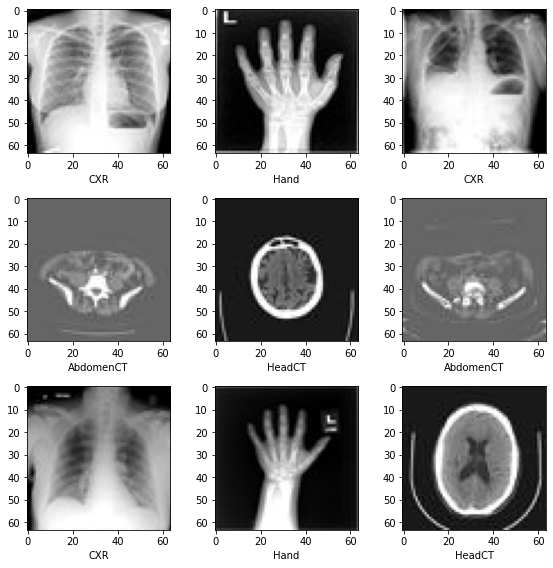

In [ ]:
plt.subplots(3, 3, figsize=(8, 8))
for i, k in enumerate(np.random.randint(total_image_count, size=9)):
    img = PIL.Image.open(image_file_list[k])
    arr = np.array(img)
    plt.subplot(3, 3, i + 1)
    plt.xlabel(category_names[image_category[k]])
    plt.imshow(arr, cmap="gray", vmin=0, vmax=255)
plt.tight_layout()
plt.show()

### Loading Image

In [ ]:
image_list = []
for image_path in image_file_list:
  image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
  image_list.append(image)

In [ ]:
# Load themnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape,"x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

11490434/11490434 [==============================] - 2s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,) x_test shape: (10000, 28, 28) y_test shape: (10000,)


### Preparing the training, validation & test split

In [ ]:
image_list = np.array(image_list, dtype=np.float32)
image_list = np.expand_dims(image_list, axis=-1)
image_list.shape

(50000, 64, 64, 1)

In [ ]:
val_frac = 0.1
test_frac = 0.1
length = len(image_list)
indices = np.arange(length)
np.random.shuffle(indices)

test_split = int(test_frac * length)
val_split = int(val_frac * length) + test_split
test_indices = indices[:test_split]
val_indices = indices[test_split:val_split]
train_indices = indices[val_split:]

x_train = np.array([image_list[i] for i in train_indices])
y_train = np.array([image_category[i] for i in train_indices])
x_val = np.array([image_list[i] for i in val_indices])
y_val = np.array([image_category[i] for i in val_indices])
x_test = np.array([image_list[i] for i in test_indices])
y_test = np.array([image_category[i] for i in test_indices])

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape, "y_val shape:", y_val.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (40000, 64, 64, 1) y_train shape: (40000,)
x_val shape: (5000, 64, 64, 1) y_val shape: (5000,)
x_test shape: (5000, 64, 64, 1) y_test shape: (5000,)


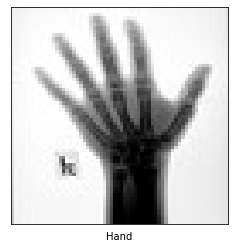

In [ ]:
# Show one of the images from the training dataset
plt.xticks([])
plt.yticks([])
plt.xlabel(category_names[y_train[299]])
plt.imshow(x_train[299],cmap=plt.cm.binary)

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, AvgPool2D
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [ ]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(Conv2D(filters=64, kernel_size=(3,3),strides=(1, 1), padding='same', activation='relu', input_shape=(64,64,1))) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Conv2D(filters=32, kernel_size=(3,3),strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=16, kernel_size=(3,3),strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
x_train = x_train.reshape(-1, 64, 64,1) #Reshape for CNN 
x_test = x_test.reshape(-1, 64, 64, 1)
x_train.shape

(40000, 64, 64, 1)

In [ ]:
model_log=model.fit(x_train, y_train,
          batch_size=50,
          epochs=10,
          verbose=1,
          validation_split=.3)

Epoch 1/10
560/560 [==============================] - 18s 13ms/step - loss: 0.1331 - accuracy: 0.9571 - val_loss: 0.0123 - val_accuracy: 0.9970
Epoch 2/10
560/560 [==============================] - 6s 10ms/step - loss: 0.0137 - accuracy: 0.9965 - val_loss: 0.0060 - val_accuracy: 0.9983
Epoch 3/10
560/560 [==============================] - 6s 11ms/step - loss: 0.0109 - accuracy: 0.9969 - val_loss: 0.0056 - val_accuracy: 0.9983
Epoch 4/10
560/560 [==============================] - 6s 11ms/step - loss: 0.0075 - accuracy: 0.9977 - val_loss: 0.0025 - val_accuracy: 0.9989
Epoch 5/10
560/560 [==============================] - 6s 10ms/step - loss: 0.0128 - accuracy: 0.9964 - val_loss: 0.0037 - val_accuracy: 0.9987
Epoch 6/10
560/560 [==============================] - 6s 11ms/step - loss: 0.0068 - accuracy: 0.9982 - val_loss: 0.0066 - val_accuracy: 0.9982
Epoch 7/10
560/560 [==============================] - 6s 11ms/step - loss: 0.0029 - accuracy: 0.9993 - val_loss: 0.0020 - val_accuracy: 0.999

In [ ]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9983999729156494


In [ ]:
predictions = model.predict(x_test)
predictions[0]

157/157 [==============================] - 0s 2ms/step


array([5.1616794e-15, 1.0000000e+00, 4.8830407e-18, 3.9120797e-11,
       2.9638416e-16, 7.7329158e-16, 3.2682545e-18, 7.6330258e-18,
       5.0046608e-17, 1.3051609e-16], dtype=float32)

In [ ]:
np.argmax(predictions[0])

1

In [ ]:
x_test = x_test.reshape(-1,64, 64)
x_test.shape

(5000, 64, 64)

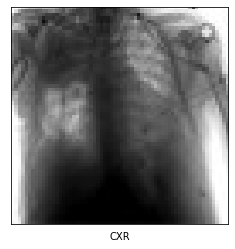

In [ ]:
# Show one of the images from the test dataset
plt.xticks([])
plt.yticks([])
plt.xlabel(category_names[y_test[10]])
plt.imshow(x_test[10],cmap=plt.cm.binary)

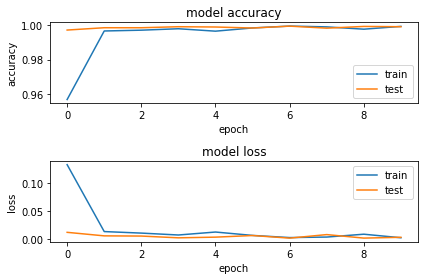

In [ ]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()